### TP01 : Translation Rotation 2D 3D

# 2D
On a essayé de faire un code qui  permet de réaliser plusieurs manipulations d'image en utilisant les bibliothèques 'PIL' et 'matplotlib'. Tout d'abord, une translation de l'image est effectuée en ajoutant des valeurs de déplacement sur les axes X et Y (60 pixels en X et 110 pixels en Y). Une nouvelle image est crée avec des dimensions adaptées pour accueillir l'image déplacée, et l'image originale est insérée à la nouvelle position. Après cela, une rotation de l'image est réalisée à 30 degrés, ce qui permet de modifier l'orientation de l'image. Ces opérations montre comment on peut manipuler une image en utilisant les transformations géométriques : la translation et la rotation.

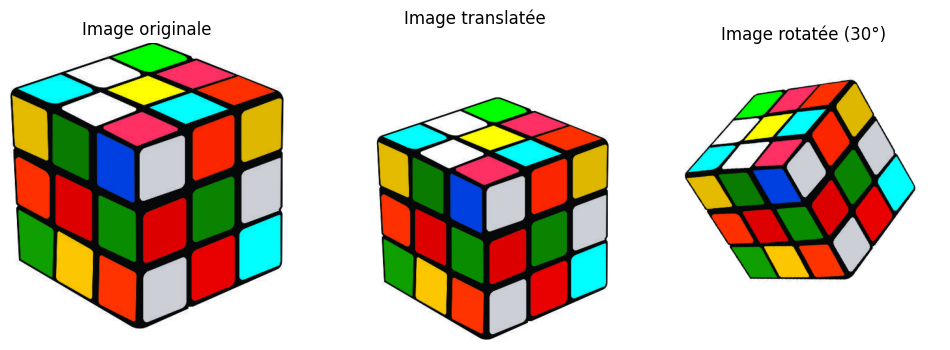

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# --- Charger et afficher l'image originale ---
img_original = mpimg.imread(r"C:\Users\DELL\Desktop\Cube-2D.jpg")

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_original)
plt.title("Image originale")
plt.axis("off")

# --- Translation ---
image_path = r"C:\Users\DELL\Desktop\Cube-2D.jpg"
image = Image.open(image_path)

Tx, Ty = 60, 110  # valeurs de translation
new_width = image.width + Tx
new_height = image.height + Ty
new_image = Image.new("RGB", (new_width, new_height), (255, 255, 255))  # fond blanc
new_image.paste(image, (Tx, Ty))

plt.subplot(1,3,2)
plt.imshow(new_image)
plt.title("Image translatée")
plt.axis("off")

# --- Rotation ---
rotated_image = image.rotate(30, expand=True)

plt.subplot(1,3,3)
plt.imshow(rotated_image)
plt.title("Image rotatée (30°)")
plt.axis("off")

plt.show()


# 3D
On a définit d'abord les sommets et les faces du cube, puis utilise 'Poly3DCollection' pour afficher le cube dans un espace tridimensionnel. Le cube après une rotation de 30 degrés autour de l'axe Z, et le cube déplacé par une translation de '(2, 2, 0)' dans l'espace. La rotation est effectuée à l'aide d'une matrice de rotation, tandis que la translation est appliquée en ajoutant des valeurs spécifiques aux coordonnées des sommets. Chaque transformation est visualisée grâce à 'matplotlib' et 'mpl_toolkits.mplot3d', permettant ainsi une compréhension visuelle claire des manipulations du cube.


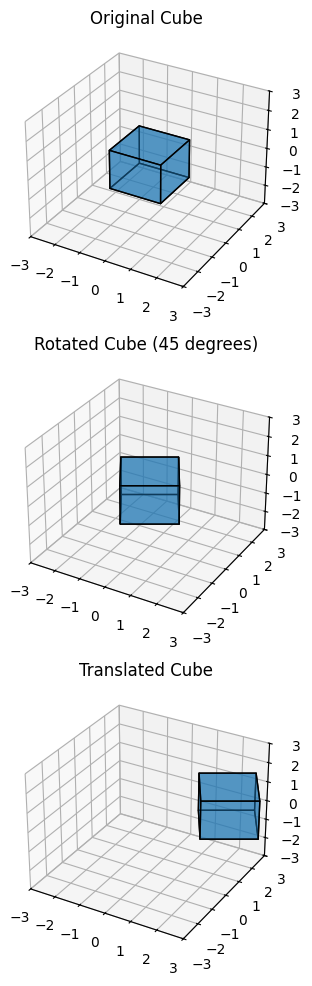

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


vertices = np.array([
    [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
    [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]
])


faces = [
    [vertices[j] for j in [0, 1, 2, 3]],
    [vertices[j] for j in [4, 5, 6, 7]],
    [vertices[j] for j in [0, 1, 5, 4]],
    [vertices[j] for j in [2, 3, 7, 6]],
    [vertices[j] for j in [0, 3, 7, 4]],
    [vertices[j] for j in [1, 2, 6, 5]]
]

def plot_cube(ax, vertices, title):
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    ax.set_title(title)
    
    cube = Poly3DCollection([[vertices[j] for j in face] for face in [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]]], edgecolor='k', alpha=0.5)
    ax.add_collection3d(cube)

def rotate_cube(vertices, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    return np.dot(vertices, rotation_matrix.T)

def translate_cube(vertices, translation):
    return vertices + np.array(translation)

fig = plt.figure(figsize=(8, 12))


ax1 = fig.add_subplot(311, projection='3d')
plot_cube(ax1, vertices, "Original Cube")


rotated_vertices = rotate_cube(vertices, 30)
ax2 = fig.add_subplot(312, projection='3d')
plot_cube(ax2, rotated_vertices, "Rotated Cube (45 degrees)")


translated_vertices = translate_cube(rotated_vertices, (2, 2, 0))
ax3 = fig.add_subplot(313, projection='3d')
plot_cube(ax3, translated_vertices, "Translated Cube")

plt.show()

### TP02 : captures d'une camera tourne autour d'un cube
On a commencé par définir les sommets et les faces du cube, puis appliquer une rotation de 36° à chaque étape (en répétant cette rotation 10 fois). À chaque itération, une image du cube sera enregistrée. Ensuite, ces images sont utilisées pour créer un fichier GIF animé, où chaque image correspond à un état différent du cube après une rotation. Ce GIF est ensuite sauvegardé sous le nom 'rotation.gif'. Le code utilise 'matplotlib' pour la visualisation du cube et 'imageio' pour créer et enregistrer le GIF. La fonction 'draw_cube' s'occupe de dessiner le cube dans un espace 3D avec une vue fixe, en appliquant la rotation à l'aide d'une matrice de rotation. L'animation est rendue possible en affichant le GIF généré via 'IPython.display'.

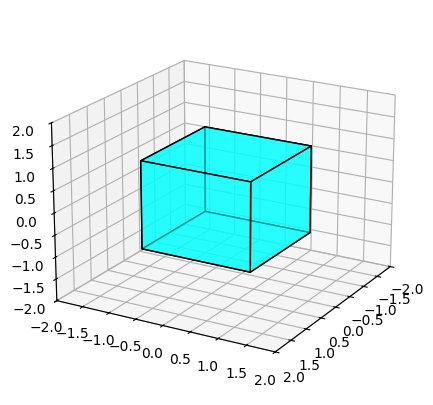

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def draw_cube(ax, rotation_angle):
    points = np.array([
        [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
        [-1, -1,  1], [1, -1,  1], [1, 1,  1], [-1, 1,  1]
    ])

    faces = [[points[j] for j in [0, 1, 2, 3]],
             [points[j] for j in [4, 5, 6, 7]],
             [points[j] for j in [0, 1, 5, 4]],
             [points[j] for j in [2, 3, 7, 6]],
             [points[j] for j in [0, 3, 7, 4]],
             [points[j] for j in [1, 2, 6, 5]]]

    theta = np.radians(rotation_angle)
    R = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

    rotated_faces = [[np.dot(R, v) for v in face] for face in faces]
    return rotated_faces

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2]); ax.set_ylim([-2, 2]); ax.set_zlim([-2, 2])

def update(frame):
    ax.cla()
    faces = draw_cube(ax, frame)
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan',
                                         linewidths=1, edgecolors='black', alpha=0.6))
    ax.set_xlim([-2, 2]); ax.set_ylim([-2, 2]); ax.set_zlim([-2, 2])
    ax.view_init(elev=20, azim=30)

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 10), interval=200)
HTML(ani.to_jshtml())


### TP03 : Vidéo d'un objet qui change de position à partir des frames
Tout d'abord, on a chargeé une image. Ensuite, pour chaque image de l'animation, un cercle est dessiné à une position calculée en fonction de l'indice de l'image, de sorte qu'il se déplace progressivement de gauche à droite tout en restant centré verticalement. Ces images sont enregistrées, puis assemblées en une vidéo à l'aide d'OpenCV, avec un taux de 30 images par seconde. Enfin, la vidéo est sauvegardée. Ce processus permet de créer une animation fluide et de la convertir en fichier vidéo.

In [13]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import os

image_size = 500  
frame_count = 80  
circle_radius = 30  
output_folder = "animation_frames" 

background_image_path = r"C:\Users\DELL\Desktop\background.jpg"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def load_background(image_path):
    """ Charge et redimensionne l'image de fond. """
    bg = Image.open(image_path)
    bg = bg.resize((image_size, image_size))  
    return bg

def generate_frame(frame_index, background):
    """ Génère une image avec un cercle se déplaçant sur un fond personnalisé. """
    
    x_position = int((frame_index / frame_count) * (image_size - 2 * circle_radius)) + circle_radius
    y_position = image_size // 2  

    img = background.copy()
    draw = ImageDraw.Draw(img)

    draw.ellipse(
        (x_position - circle_radius, y_position - circle_radius, 
         x_position + circle_radius, y_position + circle_radius),
        fill=(255, 50, 255)
    )

    img.save(f"{output_folder}/frame_{frame_index:03d}.png")

background = load_background(background_image_path)

for i in range(frame_count):
    generate_frame(i, background)

output_video = "animation.avi"
frame_rate = 30  

images = [cv2.imread(f"{output_folder}/frame_{i:03d}.png") for i in range(frame_count)]
height, width, layers = images[0].shape

video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"XVID"), frame_rate, (width, height))

for img in images:
    video.write(img)

video.release()

print(f"Vidéo enregistrée sous {output_video}")


Vidéo enregistrée sous animation.avi
